In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 60% 98.0M/163M [00:00<00:00, 997MB/s]
100% 163M/163M [00:00<00:00, 836MB/s] 


In [4]:
import os
import zipfile
zip_path = '/content/face-mask-dataset.zip'
data_path = '/content/dataset'

if not os.path.exists(data_path):
  os.makedirs(data_path)

In [5]:
with zipfile.ZipFile(zip_path, 'r') as fille:
  fille.extractall(data_path)
  print("Dataset extracted...")

Dataset extracted...


In [6]:
!ls

cannes-france-aishwarya-rai-attends-the-la-venue-de-lavenir-red-carpet-at-the-78th-annual.webp
dataset
drive
face-mask-dataset.zip
kaggle.json
pexels-photo-3571628.webp
portrait-of-young-woman-putting-on-a-protective-mask.webp
sample_data
woman-in-a-surgical-mask.webp
wp3983425.webp


In [13]:


#importing the dependencies

In [14]:
!pip install opencv-python-headless

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [16]:

with_mask_path = '/content/dataset/data/with_mask/'
without_mask_path = '/content/dataset/data/without_mask/'

In [17]:
mask_img_file = os.listdir(with_mask_path)
no_mask_img_file = os.listdir(without_mask_path)

In [18]:
print(mask_img_file[0:5])

['with_mask_2005.jpg', 'with_mask_2023.jpg', 'with_mask_1617.jpg', 'with_mask_2175.jpg', 'with_mask_3034.jpg']


In [19]:
print(no_mask_img_file[0:5])

['without_mask_1278.jpg', 'without_mask_3195.jpg', 'without_mask_937.jpg', 'without_mask_1800.jpg', 'without_mask_65.jpg']


In [20]:
print(f"No. of with mask image : {len(mask_img_file)}")
print(f"No. of without mask image : {len(no_mask_img_file)}")

No. of with mask image : 3725
No. of without mask image : 3828


In [21]:
#creating label for the images from two class
# with mask --> 1
# without mask --> 0

In [22]:
mask_label = [1]* len(mask_img_file)
no_mask_label = [0] * len(no_mask_img_file)

In [23]:
print(no_mask_label[0:5])
print(mask_label[:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [24]:
labels = mask_label + no_mask_label
print(len(labels))
print(labels[:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [25]:
#Displaying the images

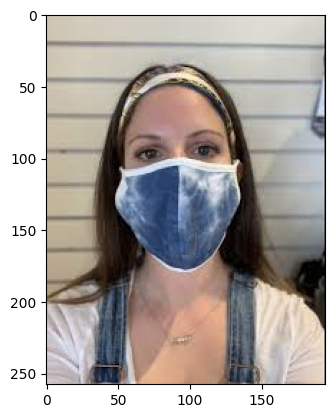

In [26]:
img = mpimg.imread('/content/dataset/data/with_mask/with_mask_2634.jpg')
plt.imshow(img)

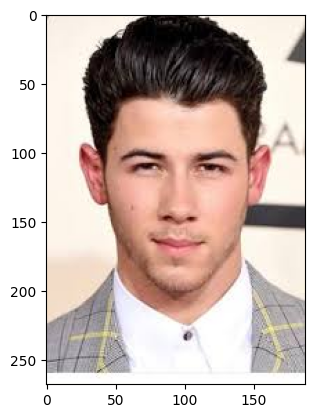

In [27]:
img = mpimg.imread('/content/dataset/data/without_mask/without_mask_2733.jpg')
plt.imshow(img)

In [28]:
# Image Processing
# 1. Resize the images
# 2. Convert to NumPy arrays

In [29]:
import tensorflow as tf
import os

In [30]:
full_path = '/content/full_data/'

if not os.path.exists(full_path):
  os.makedirs(full_path)

In [31]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/dataset/data',
    validation_split = 0.25,
    label_mode = 'binary',
    subset = 'training',
    image_size = (150,150),
    batch_size = 32,
    seed = 133
)


test_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/dataset/data',
    validation_split = 0.25,
    label_mode = 'binary',
    subset = 'validation',
    image_size = (150,150),
    batch_size = 32,
    seed = 133
)

Found 7553 files belonging to 2 classes.
Using 5665 files for training.
Found 7553 files belonging to 2 classes.
Using 1888 files for validation.


In [32]:
def normalize(image, label):
  image = tf.cast(image, tf.float32) / 255.0
  return image, label


In [33]:
train_ds = train_ds.map(normalize)
test_ds = test_ds.map(normalize)

In [34]:
train_ds.save('/content/full_data/train')
test_ds.save('/content/full_data/test')

In [35]:
tain_ds = tf.data.Dataset.load('/content/full_data/train')
test_ds = tf.data.Dataset.load('/content/full_data/test')

[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]]


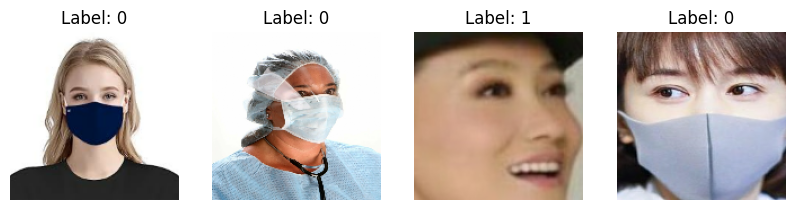

In [52]:
for images, labels in train_ds.take(1):

    print(labels.numpy())

    plt.figure(figsize=(10, 5))
    for i in range(4):
        ax = plt.subplot(1, 4, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f"Label: {int(labels[i])}")
        plt.axis("off")
    plt.show()
    break

In [36]:
# train_ds and test_ds are redy to be fed to the cnn.

In [37]:
from tensorflow.keras import layers, models

In [38]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (150,150,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),

    layers.Dense(8, activation= 'relu'),

    layers.Dense(1, activation= 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,393 (18.42 MB)

 Trainable params: 4,829,393 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

model_check_point = ModelCheckpoint(
    'mask_detection_model.keras',
    monitor = 'val_loss',
    save_best_only = True,
    mode = 'min'
)

In [42]:
history = model.fit(train_ds, validation_data = test_ds, epochs = 10, verbose=1, callbacks = [earlystopping, model_check_point])

Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.7827 - loss: 0.4494 - val_accuracy: 0.8792 - val_loss: 0.2904
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.8957 - loss: 0.2594 - val_accuracy: 0.9100 - val_loss: 0.2283
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.9113 - loss: 0.2182 - val_accuracy: 0.9280 - val_loss: 0.2086
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9238 - loss: 0.1890 - val_accuracy: 0.9417 - val_loss: 0.1756
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9249 - loss: 0.1915 - val_accuracy: 0.9386 - val_loss: 0.1890
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.9496 - loss: 0.1479 - val_accuracy: 0.9476 - val_loss: 0.1782
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.9578 - loss: 0.1248 - val_accuracy: 0.9523 - val_loss: 0.1678
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.9675 - loss: 0.0888 - val_accu

In [43]:
loss, accuraccy =  model.evaluate(test_ds)

59/59 ━━━━━━━━━━━━━━━━━━━━ 25s 429ms/step - accuracy: 0.9496 - loss: 0.1770


In [44]:
print(f"Accuracy :: {accuraccy*100:.2f}")
print("Loss :: ", loss)

Accuracy :: 95.23
Loss ::  0.16782210767269135


In [46]:
histt= history.history

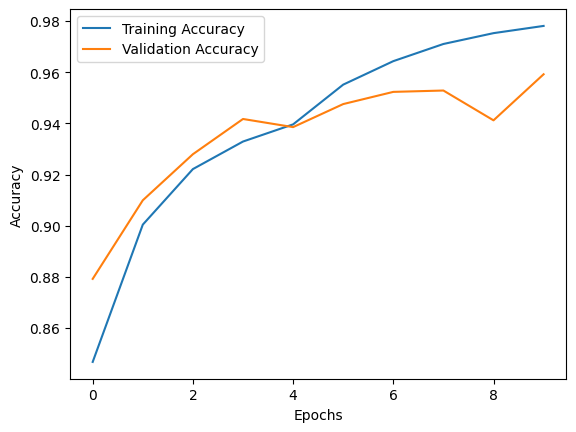

In [47]:
plt.plot(histt['accuracy'], label = "Training Accuracy")
plt.plot(histt['val_accuracy'], label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

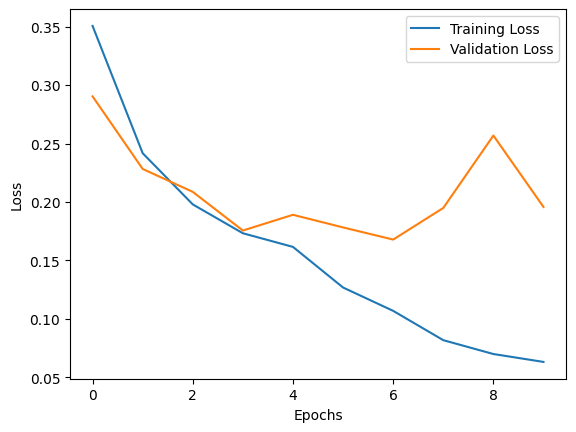

In [48]:
plt.plot(histt['loss'], label = 'Training Loss')
plt.plot(histt['val_loss'], label = 'Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [49]:
from tensorflow.keras.preprocessing import image

In [53]:
def predict_image(image_path):
  img = Image.open(image_path).convert('RGB')
  img = img.resize((150,150))
  img = np.array(img) / 255.0
  img_batch = np.expand_dims(img, axis = 0)

  prediction = model.predict(img_batch)

  probability = prediction[0][0]

  if(probability > 0.5):
    print("NO MASK")
  else:
    print("MASK")

  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [62]:
img_list = []

# img_list.append('/content/cannes-france-aishwarya-rai-attends-the-la-venue-de-lavenir-red-carpet-at-the-78th-annual.webp')
img_list.append('/content/pexels-photo-3571628.webp')
img_list.append('/content/portrait-of-young-woman-putting-on-a-protective-mask.webp')
img_list.append('/content/woman-in-a-surgical-mask.webp')
# img_list.append('/content/wp3983425.webp')
# img_list.append('/content/WhatsApp Image 2025-12-06 at 02.43.59_11c49f06.jpg')
# img_list.append('/content/bollywood-actress-sushmita-sen-attends-a-fashion-show-by-designer-vikram-phadnis-in-mumbai-on.webp')
img_list.append('/content/240_F_1567621131_O80tkKHBQjGruFg9jG49kbH0lzP7CAVf.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
MASK


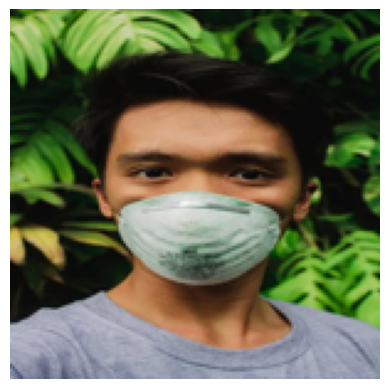

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
MASK


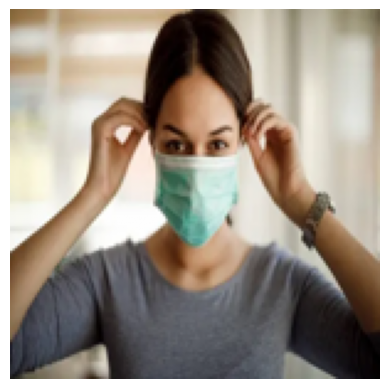

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
MASK


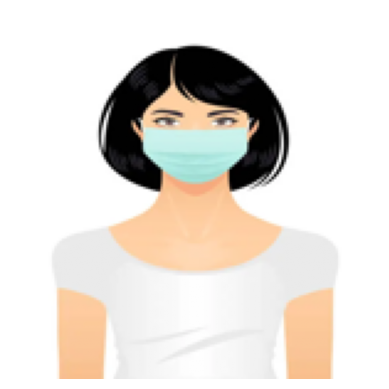

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
NO MASK


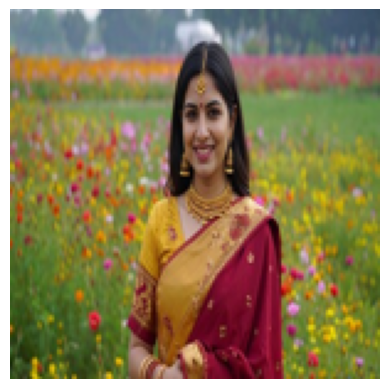

In [63]:
for image_path in img_list:
  predict_image(image_path)

In [64]:
mask_counts = len(os.listdir('/content/dataset/data/with_mask'))
no_mask_counts = len(os.listdir('/content/dataset/data/without_mask'))

In [65]:
print(f"Mask images : {mask_counts}")
print(f"No mask images : {no_mask_counts}")

Mask images : 3725
No mask images : 3828
